In [2]:
using JLD
using Statistics
using StatsBase 
using LinearAlgebra
using JLD2
using FileIO

In [3]:
using MultivariateStats

In [4]:
include("set.jl")


# latex_width = 421.10046 # \the\textwidth latex command

latex_width = 426.8
latex_prl_width = 486.0 # pt for two 2 cols.
best_size = set_size(latex_width, fraction=1)

(5.905631659056317, 3.649881090334235)

In [5]:
data = load("../data/experiment/images.jld")

Dict{String, Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [6]:
cam_1 = Float64.(data["ImagesBTV50"])
cam_2 = Float64.(data["ImagesBTV53"])
cam_3  = Float64.(data["ImagesBTV26"])
cam_4 = Float64.(data["ImagesIS2"])
charge  = Float64.(data["charge"])

enumerate_events = collect(1:length(charge));

In [7]:
intensity(x) = [sum(x, dims=(2, 3))...]

intensity (generic function with 1 method)

In [16]:
size = set_size(latex_width, ratio=1, fraction=1)

(5.905631659056317, 5.905631659056317)

In [21]:
size = set_size(latex_width, ratio=1, fraction=0.6)

(3.5433789954337898, 3.5433789954337898)

In [14]:
size = set_size(latex_width, ratio=:golden, fraction=1)

(5.905631659056317, 3.649881090334235)

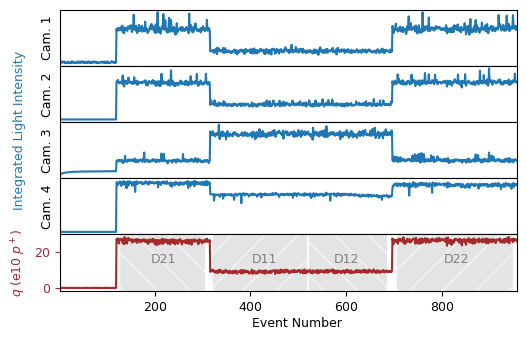

PyObject Text(0.45, 0.02, 'Event Number')

In [11]:
size = set_size(latex_width, ratio=:golden, fraction=1)
c1 = "brown"
c2 = "C0"
fig, ax = plt.subplots(5,1, figsize=size, sharex=true)

ax[1].plot(enumerate_events, intensity(cam_1), color=c2)
ax[2].plot(enumerate_events, intensity(cam_2), color=c2)
ax[3].plot(enumerate_events, intensity(cam_3), color=c2)
ax[4].plot(enumerate_events, intensity(cam_4), color=c2)
ax[5].plot(enumerate_events, charge, color=c1)

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])
ax[4].set_yticks([])

ax[1].set_ylabel("Cam. 1")
ax[2].set_ylabel("Cam. 2")
ax[3].set_ylabel("Cam. 3")
ax[4].set_ylabel("Cam. 4")
# ax[5].set_ylabel(L"q (e10)")
ax[5].set_ylabel(L"q \; (\mathrm{e10} \; p^+)")

# ax[5].set_ylabel("Population")

ax[5].yaxis.label.set_color(c1)
ax[5].tick_params(axis="y", colors=c1)

ax[5].set_xlim(1, maximum(enumerate_events))

ax[5].axvspan(125, 305, hatch="\\",  facecolor="lightgray",edgecolor="white", alpha=0.6)
ax[5].axvspan(320, 518, hatch="/",  facecolor="lightgray",edgecolor="white", alpha=0.6)
ax[5].axvspan(521, 685, hatch="\\",  facecolor="lightgray",edgecolor="white", alpha=0.6)
ax[5].axvspan(705, 950, hatch="/",  facecolor="lightgray",edgecolor="white", alpha=0.6)

ax[5].text(0.2,0.5,"D21", transform=ax[5].transAxes, color="gray",)
ax[5].text(0.42,0.5,"D11", transform=ax[5].transAxes, color="gray",)
ax[5].text(0.6,0.5,"D12", transform=ax[5].transAxes, color="gray",)
ax[5].text(0.84,0.5,"D22", transform=ax[5].transAxes, color="gray")

fig.subplots_adjust(hspace=0.0, wspace=0.0)

fig.text(0.046, 0.55, "Integrated Light Intensity", va="center", rotation="vertical", color=c2)
fig.text(0.45, 0.02, "Event Number", va="center", rotation="horizontal")

# fig.savefig("exp-info-2.pdf", bbox_inches = "tight")

In [12]:
x_pix = [0.0271,0.0216,0.114,0.0303]
y_pix = [0.0305,0.0234,0.125,0.0298]

4-element Vector{Float64}:
 0.0305
 0.0234
 0.125
 0.0298

In [13]:
size = set_size(latex_width, ratio=0.8, fraction=1)

(5.905631659056317, 4.724505327245054)

In [15]:
size = set_size(latex_width, ratio=1, fraction=0.75)

(4.429223744292238, 4.429223744292238)

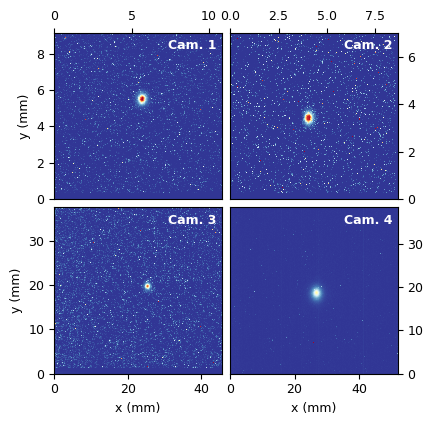

In [14]:
size = set_size(latex_width, ratio=1, fraction=0.75)

fig, ax = plt.subplots(2,2, figsize=size)

fig.subplots_adjust(hspace=0.05, wspace=0.05)

ev_number = 200

ax[1,1].pcolormesh(collect(0:400) .* 0.0271, collect(0:300) .* 0.0305,  cam_1[ev_number,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(collect(0:400) .* 0.0216, collect(0:300) .* 0.0234, cam_2[ev_number,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(collect(0:400) .* 0.114, collect(0:300) .* 0.125, cam_3[ev_number,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(collect(0:1280) .* 0.0406, collect(0:960) .* 0.0400, cam_4[ev_number,:,:], cmap="RdYlBu_r")

ax[1,1].text(0.68,0.9,"Cam. 1", transform=ax[1].transAxes, color="white", fontweight="bold")
ax[1,2].text(0.68,0.9,"Cam. 2", transform=ax[1,2].transAxes, color="white", fontweight="bold")
ax[2,1].text(0.68,0.9,"Cam. 3", transform=ax[2,1].transAxes, color="white", fontweight="bold")
ax[2,2].text(0.68,0.9,"Cam. 4", transform=ax[2,2].transAxes, color="white", fontweight="bold")

ax[1,1].set_ylabel("y (mm)")
ax[2,1].set_ylabel("y (mm)")

ax[2,1].set_xlabel("x (mm)")
ax[2,2].set_xlabel("x (mm)")

ax[1,2].yaxis.set_label_position("right")
ax[1,2].yaxis.tick_right()

ax[2,2].yaxis.set_label_position("right")
ax[2,2].yaxis.tick_right()

ax[1,2].xaxis.set_label_position("top")
ax[1,2].xaxis.tick_top()

ax[1,1].xaxis.set_label_position("top")
ax[1,1].xaxis.tick_top()

# fig.savefig("event-example.png", bbox_inches = "tight")

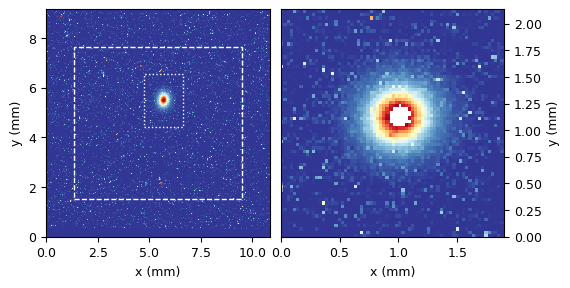

In [12]:
size = set_size(latex_width, ratio=0.5, fraction=1)

fig, (ax, ax2) = plt.subplots(1,2, figsize=size)

fig.subplots_adjust(hspace=0.1, wspace=0.05)

ev_number = 200

ax.pcolormesh(collect(0:400) .* 0.0271, collect(0:300) .* 0.0305,  cam_1[ev_number,:,:], cmap="RdYlBu_r")

img_tmpp = cam_1[ev_number,145:145+70, 175:175+70]

img_tmpp = replace(x-> x > 3000 ? NaN : x, img_tmpp )
ax2.pcolormesh(collect(0:70) .* 0.0271, collect(0:70) .* 0.0305, img_tmpp, cmap="RdYlBu_r")

proxy = plt.Rectangle((50*0.0271, 50*0.0305), 300*0.0271, 200*0.0305, fc = "None", ec=:white, ls=:dashed, lw=1, label="Rubidium Section")
ax.add_patch(proxy)

proxy = plt.Rectangle((175*0.0271, 145*0.0305), 70*0.0271, 70*0.0305, fc = "None", ec=:white, ls=:dotted, lw=1, label="Rubidium Section")
ax.add_patch(proxy)


ax.set_ylabel("y (mm)")
ax.set_xlabel("x (mm)")

ax2.set_ylabel("y (mm)")
ax2.set_xlabel("x (mm)")

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()


# fig.savefig("noise-example.png", bbox_inches = "tight")

In [13]:
function linreg(x, y; bias_c=true)
    
	X = Array{Float64}(undef, length(x),1)
	Y = Vector{Float64}(undef, length(y))
	X[1:length(x),1] .= x
	Y[1:length(y)] .= y
	sol = llsq(X, Y)
	coeff, bias = sol[1], sol[2]
    
    if bias_c == true
        g1(x) = bias + coeff*x 
        return g1, (coeff, bias)
    end
    
    if bias_c == false
        g2(x) = coeff*x
        return g2, (coeff, bias)
    end
    
end

linreg (generic function with 1 method)

In [14]:
minimum(charge[5 .< charge .< 15 ])

7.766900062561035

In [15]:
y1 = intensity(cam_1)
y2 = intensity(cam_2)
y3 = intensity(cam_3)
y4 = intensity(cam_4);

mask = 5 .< charge .< 15 
lin_int11, coeff11  = linreg(charge[mask], y1[mask])
lin_int12, coeff12  = linreg(charge[mask], y2[mask])
lin_int13, coeff13  = linreg(charge[mask], y3[mask])
lin_int14, coeff14  = linreg(charge[mask], y4[mask])


mask = 15 .< charge
lin_int21, coeff21  = linreg(charge[mask], y1[mask])
lin_int22, coeff22  = linreg(charge[mask], y2[mask])
lin_int23, coeff23  = linreg(charge[mask], y3[mask])
lin_int24, coeff24  = linreg(charge[mask], y4[mask])

ch1 = range(5, stop=15, length=10)
ch2 = range(20, stop=30, length=10);


In [16]:
round.(coeff24, sigdigits=7)

(261124.9, 2.06931e7)

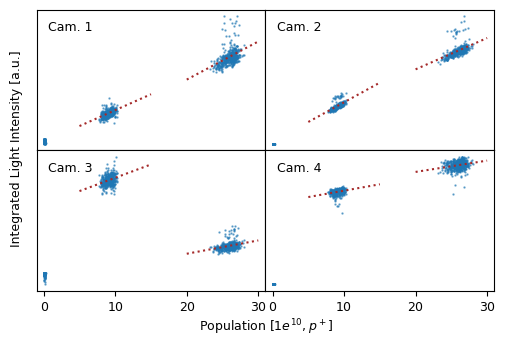

PyObject Text(0.4, 0.01, 'Population $[1e^{10}, p^+]$')

In [17]:
c1 = "C0"
c2 = "brown"

size = set_size(latex_width, fraction=1)

fig, ax = plt.subplots(2,2, figsize=size, sharex = true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])
ax[4].set_yticks([])


ax[1,1].text(0.05,0.85,"Cam. 1", transform=ax[1].transAxes, color="k", )
ax[1,2].text(0.05,0.85,"Cam. 2", transform=ax[1,2].transAxes, color="k",)
ax[2,1].text(0.05,0.85,"Cam. 3", transform=ax[2,1].transAxes, color="k",)
ax[2,2].text(0.05,0.85,"Cam. 4", transform=ax[2,2].transAxes, color="k",)


ax[4].set_xlim(-1, 31)

ax[1,1].scatter(charge, y1, s=0.5, color=c1, alpha=0.6)
ax[1,1].plot(ch1, lin_int11.(ch1), color=c2, linestyle=":")
ax[1,1].plot(ch2, lin_int21.(ch2), color=c2, linestyle=":")

ax[1,2].scatter(charge, y2, s=0.5, color=c1, alpha=0.6)
ax[1,2].plot(ch1, lin_int12.(ch1), color=c2, linestyle=":")
ax[1,2].plot(ch2, lin_int22.(ch2), color=c2, linestyle=":")

ax[2,1].scatter(charge, y3, s=0.5, color=c1, alpha=0.6)
ax[2,1].plot(ch1, lin_int13.(ch1), color=c2, linestyle=":")
ax[2,1].plot(ch2, lin_int23.(ch2), color=c2, linestyle=":")

ax[2,2].scatter(charge, y4, s=0.5, color=c1, alpha=0.6)
ax[2,2].plot(ch1, lin_int14.(ch1), color=c2, linestyle=":")
ax[2,2].plot(ch2, lin_int24.(ch2), color=c2, linestyle=":")

fig.text(0.08, 0.5, "Integrated Light Intensity [a.u.]", va="center", rotation="vertical")
fig.text(0.4, 0.01, L"Population $[1e^{10}, p^+]$", va="center", rotation="horizontal")

# fig.savefig("light-int.pdf", bbox_inches = "tight")

In [18]:
xmin, xmax = -1.5, 24.4
x_axis = range(xmin, stop=xmax, length=50)

params = (σ=0.2, σp = 4.0, s=2.775)
cam_pos = [0.0, 1.478, 15.026, 23.164]
σ_x(x) = sqrt.(params.σ^2 + 10^-4*params.σp^2*(params.s - x)^2) 

y_vals = σ_x.(x_axis);

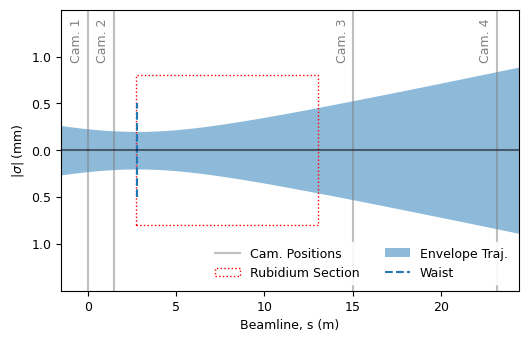

In [19]:
size = set_size(latex_width, ratio=:golden, fraction=1)
fig, ax = plt.subplots(1,1, figsize=size)

# ax.plot(x_axis, y_vals, color=:C0, label="Envelope Traj.")
# ax.plot(x_axis, -y_vals, color=:C0)
# proxy = plt.Rectangle((807.3505-804.625, -0.8), 817.6505 - 807.3505, 1.6, fc=plt.cm.bone_r(0.17), label="Rubidium Section")
# ax.add_patch(proxy)

ax.fill_between(x_axis, y_vals, -y_vals, color=:C0, alpha=0.5, lw=0.0, label="Envelope Traj.")
# ax.fill_between(x_axis, -y_vals, color=:C0, alpha=0.5, lw=0.0,)

proxy = plt.Rectangle((807.3505-804.625, -0.8), 817.6505 - 807.3505, 1.6, fc = "None", ec=:red, ls=:dotted, label="Rubidium Section")
ax.add_patch(proxy)


[ax.axvline(i, linestyle="-", color="gray", alpha=0.5) for i in cam_pos]
ax.axvline(-10, linestyle="-", color="gray", alpha=0.5, label="Cam. Positions")
ax.axhline(0, linestyle="-", color="black", alpha=0.5) 

ax.vlines(params.s, -0.5, 0.5, ls="dashed", color=:C0, label="Waist")

ax.text(cam_pos[1]-1,0.97, "Cam. 1", color="gray", rotation="vertical")
ax.text(cam_pos[2]-1,0.97, "Cam. 2", color="gray", rotation="vertical")
ax.text(cam_pos[3]-1,0.97, "Cam. 3", color="gray", rotation="vertical")
ax.text(cam_pos[4]-1,0.97, "Cam. 4", color="gray", rotation="vertical")

ylabels = [-1.0, -0.5, 0.0, 0.5, 1.0]
ymodlabels = abs.(ylabels)

ax.set_yticks(ylabels)
ax.set_yticklabels(ymodlabels, minor=false)

ax.legend(loc="lower right", ncol=2, framealpha=0.9, edgecolor=:white)

ax.set_xlim(xmin, xmax)
ax.set_ylim(-1.5, 1.5)

ax.set_ylabel(L"\left | \sigma \right |  \; (\mathrm{mm})")
ax.set_xlabel("Beamline, s (m)")

fig.savefig("setup-example.pdf", bbox_inches = "tight")